In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters


from google.colab import drive
drive.mount('/content/drive')

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

Mounted at /content/drive


In [9]:
import os
import glob as glob
import numpy as np
import pandas as pd

path= '/content/drive/MyDrive/openpose_csv/input_'

activity = ["때리기","쓰다듬기"]
act_dict = {"때리기":"hit","쓰다듬기":"pat"}

input = pd.DataFrame()
video_num = 198 
count = 0

for i in range(1,video_num+1):
  for act in activity:
    address = path +act + str(i) +".csv"
    df = pd.read_csv(address,header=None)
    df_cut = df[:52]
    df_t = np.transpose(df_cut)
    df_t['activity'] = act_dict[act]
    df_t['video_num'] = count
    df_t['frame'] = [i for i in range(1,df_t.shape[0]+1)]
    input = pd.concat([input,df_t])
    count += 1

In [25]:
input.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,activity,video_num,frame
0,0.0,0.0,0.0,0.157097,0.076285,0.006446,-0.092765,-0.001380,-0.047,-0.003746,-0.005974,0.189527,0.471463,0.0,0.0,0.0,0.0,0.095408,0.095408,0.002901,0.185175,-0.162343,-0.001132,-0.217279,0.216604,0.005480,0.095698,0.0,0.0,0.0,0.0,-2.756417,1.036741,3.451016,-2.412106,-29.945056,-13.470424,-9.079989,-1.300411,-2.602692,-5.827752,12.142044,-2.591689,-13.822991,2.827015,-63.325800,-23.586423,11.627403,4.560186,9.874370,-5.486196,-43.249874,hit,0,1
1,1.0,0.0,0.0,0.008863,-0.132252,0.001297,-0.003892,0.411450,-0.050,0.008109,0.008214,0.000000,0.000000,0.0,0.0,0.0,0.0,-0.007784,0.001427,-0.007784,-0.185709,-0.133885,-0.001166,0.000624,-0.178139,-0.010378,0.378878,0.0,0.0,0.0,0.0,-3.491930,1.534501,5.575868,-3.631184,-48.416423,-21.641171,-6.348570,-1.245584,-1.812445,-4.199654,8.514099,-2.151151,-40.794148,8.559878,-203.058569,-75.149178,40.821873,15.116911,10.660175,-6.072821,-52.813592,hit,0,2
2,2.0,0.0,0.0,-0.002267,0.001496,-0.002532,-0.186607,-0.397586,0.083,-0.006615,-0.010808,0.000000,0.000000,0.0,0.0,0.0,0.0,-0.179770,-0.000633,-0.177239,0.182935,-0.006800,-0.129068,0.000000,0.000000,-0.178505,-0.366314,0.0,0.0,0.0,0.0,-3.280308,1.045490,5.240813,-3.543752,-45.516449,-20.347406,-5.868338,-0.960142,-1.604706,-3.843140,7.895239,-1.711179,-36.591529,5.940790,-183.876477,-68.660049,-183.876477,-68.660049,10.382920,-5.591956,-51.464414,hit,0,3
3,3.0,0.0,0.0,-0.002587,0.118656,-0.000707,-0.202243,0.631652,-2.880,0.009700,-0.000030,0.000000,0.000000,0.0,0.0,0.0,0.0,0.002828,-0.200122,0.000707,-0.203303,0.128486,-0.126115,0.000000,0.000000,0.198637,0.001626,0.0,0.0,0.0,0.0,-1.947510,0.391684,3.122668,-2.179936,-27.056681,-12.168847,-4.511665,-0.650605,-1.283415,-2.904247,6.125789,-1.294284,-83.816765,12.523780,-421.238559,-156.267008,79.584523,31.421367,6.516450,-3.305176,-32.271579,hit,0,4
4,4.0,0.0,0.0,0.000073,-0.020486,-0.126966,0.886878,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,-0.000144,-0.001013,-0.000575,0.000101,0.000586,-0.021681,0.683523,-0.327555,-0.000072,-0.042729,0.0,0.0,0.0,0.0,-0.563957,0.134983,-7.837559,-3.503490,0.902776,-0.610112,-1.234064,-0.154359,-8.886042,-3.574892,1.719812,-0.330572,-39.566331,5.914109,-7.430242,-10.410910,37.599947,14.809223,-7.600528,-3.802012,1.532658,hit,0,5


데이터 불러오는 코드 작성- > 데이터 np.float64

In [43]:
# input.rename(columns = {
#                 'd_vector_1_x', 'd_vector_1_y',
#                 'd_vector_2_x', 'd_vector_2_y',
#                 'd_vector_3_x', 'd_vector_3_y',
#                 'd_vector_4_x', 'd_vector_4_y',
#                 'd_vector_5_x', 'd_vector_5_y',
#                 'd_vector_6_x', 'd_vector_6_y',
#                 'd_vector_7_x', 'd_vector_7_y',
#                 'd_vector_8_x', 'd_vector_8_y',
#                 'd_vector_9_x', 'd_vector_9_y',
#                 'd_vector_10_x', 'd_vector_10_y',
#                 'd_vector_11_x', 'd_vector_11_y',
#                 'd_vector_12_x', 'd_vector_12_y',
#                 'd_vector_13_x', 'd_vector_13_y',
#                 'd_vector_14_x', 'd_vector_14_y',
#                 'r_vector_1_x', 'r_vector_1_y',
#                 'r_vector_2_x', 'r_vector_2_y',
#                 'r_vector_3_x', 'r_vector_3_y',
#                 'r_vector_4_x', 'r_vector_4_y',
#                 'r_vector_5_x', 'r_vector_5_y',
#                 'r_vector_6_x', 'r_vector_6_y',
#                 'r_vector_7_x', 'r_vector_7_y',
#                 'r_vector_8_x', 'r_vector_8_y',
#                 'r_vector_9_x', 'r_vector_9_y',
#                 'r_vector_10_x', 'r_vector_10_y',
#                 'r_vector_11_x', 'r_vector_11_y',
#                 'activity','video_num','frame'
#                 })
                

input.dropna(axis=0, how='any', inplace=True)

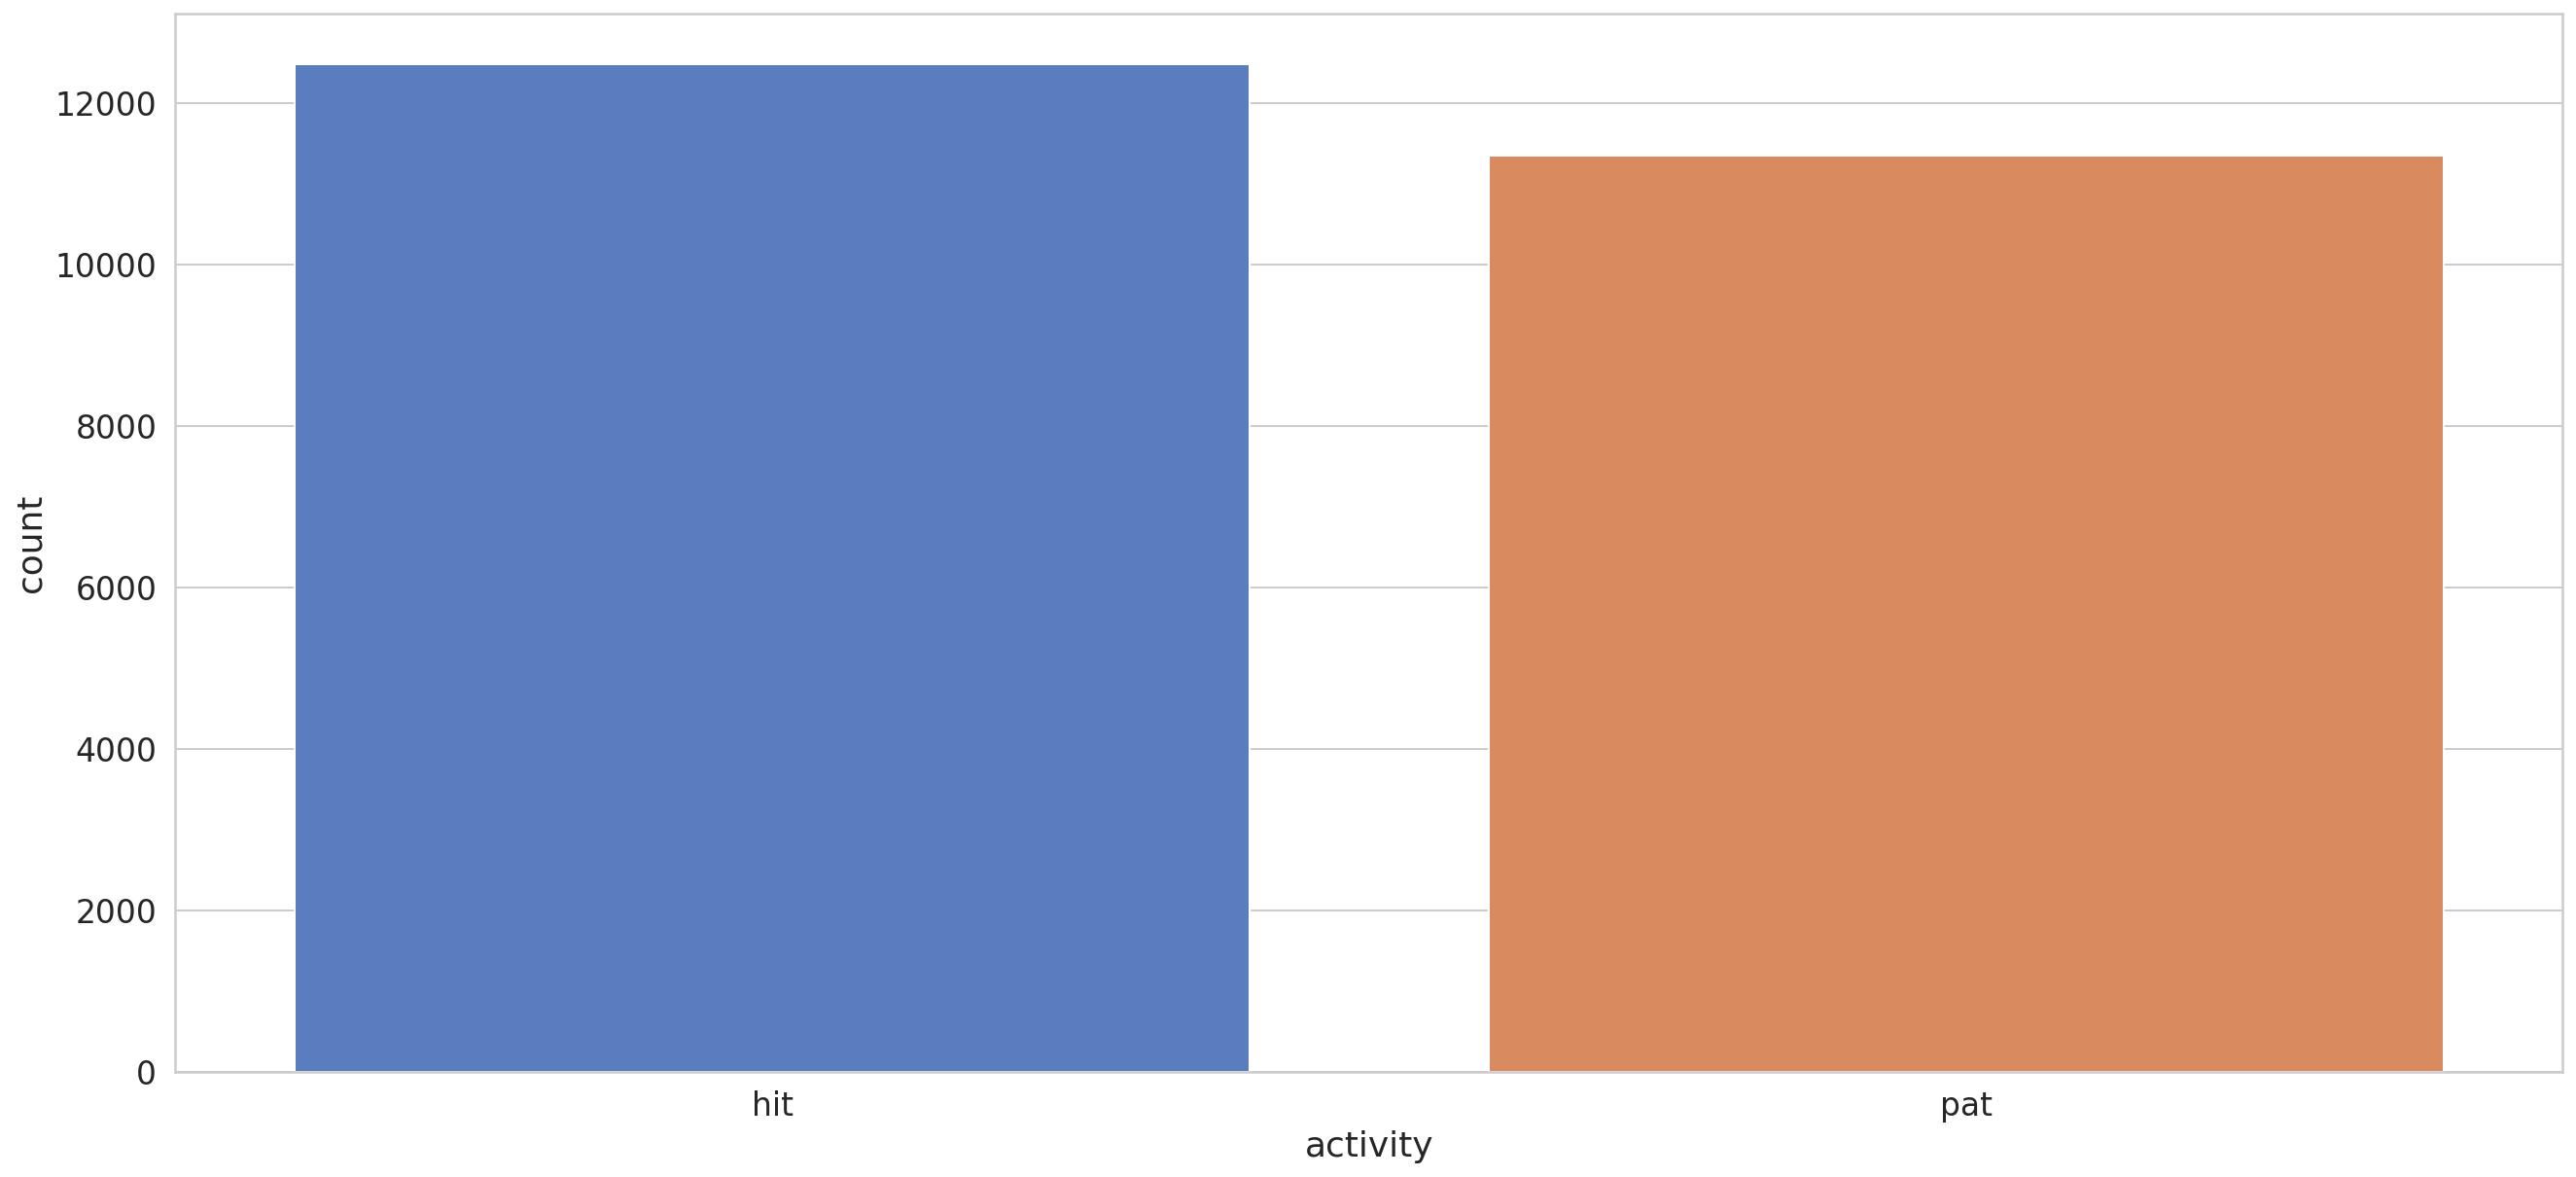

In [44]:
sns.countplot(x = 'activity',
              data = input,
              order = input.activity.value_counts().index);

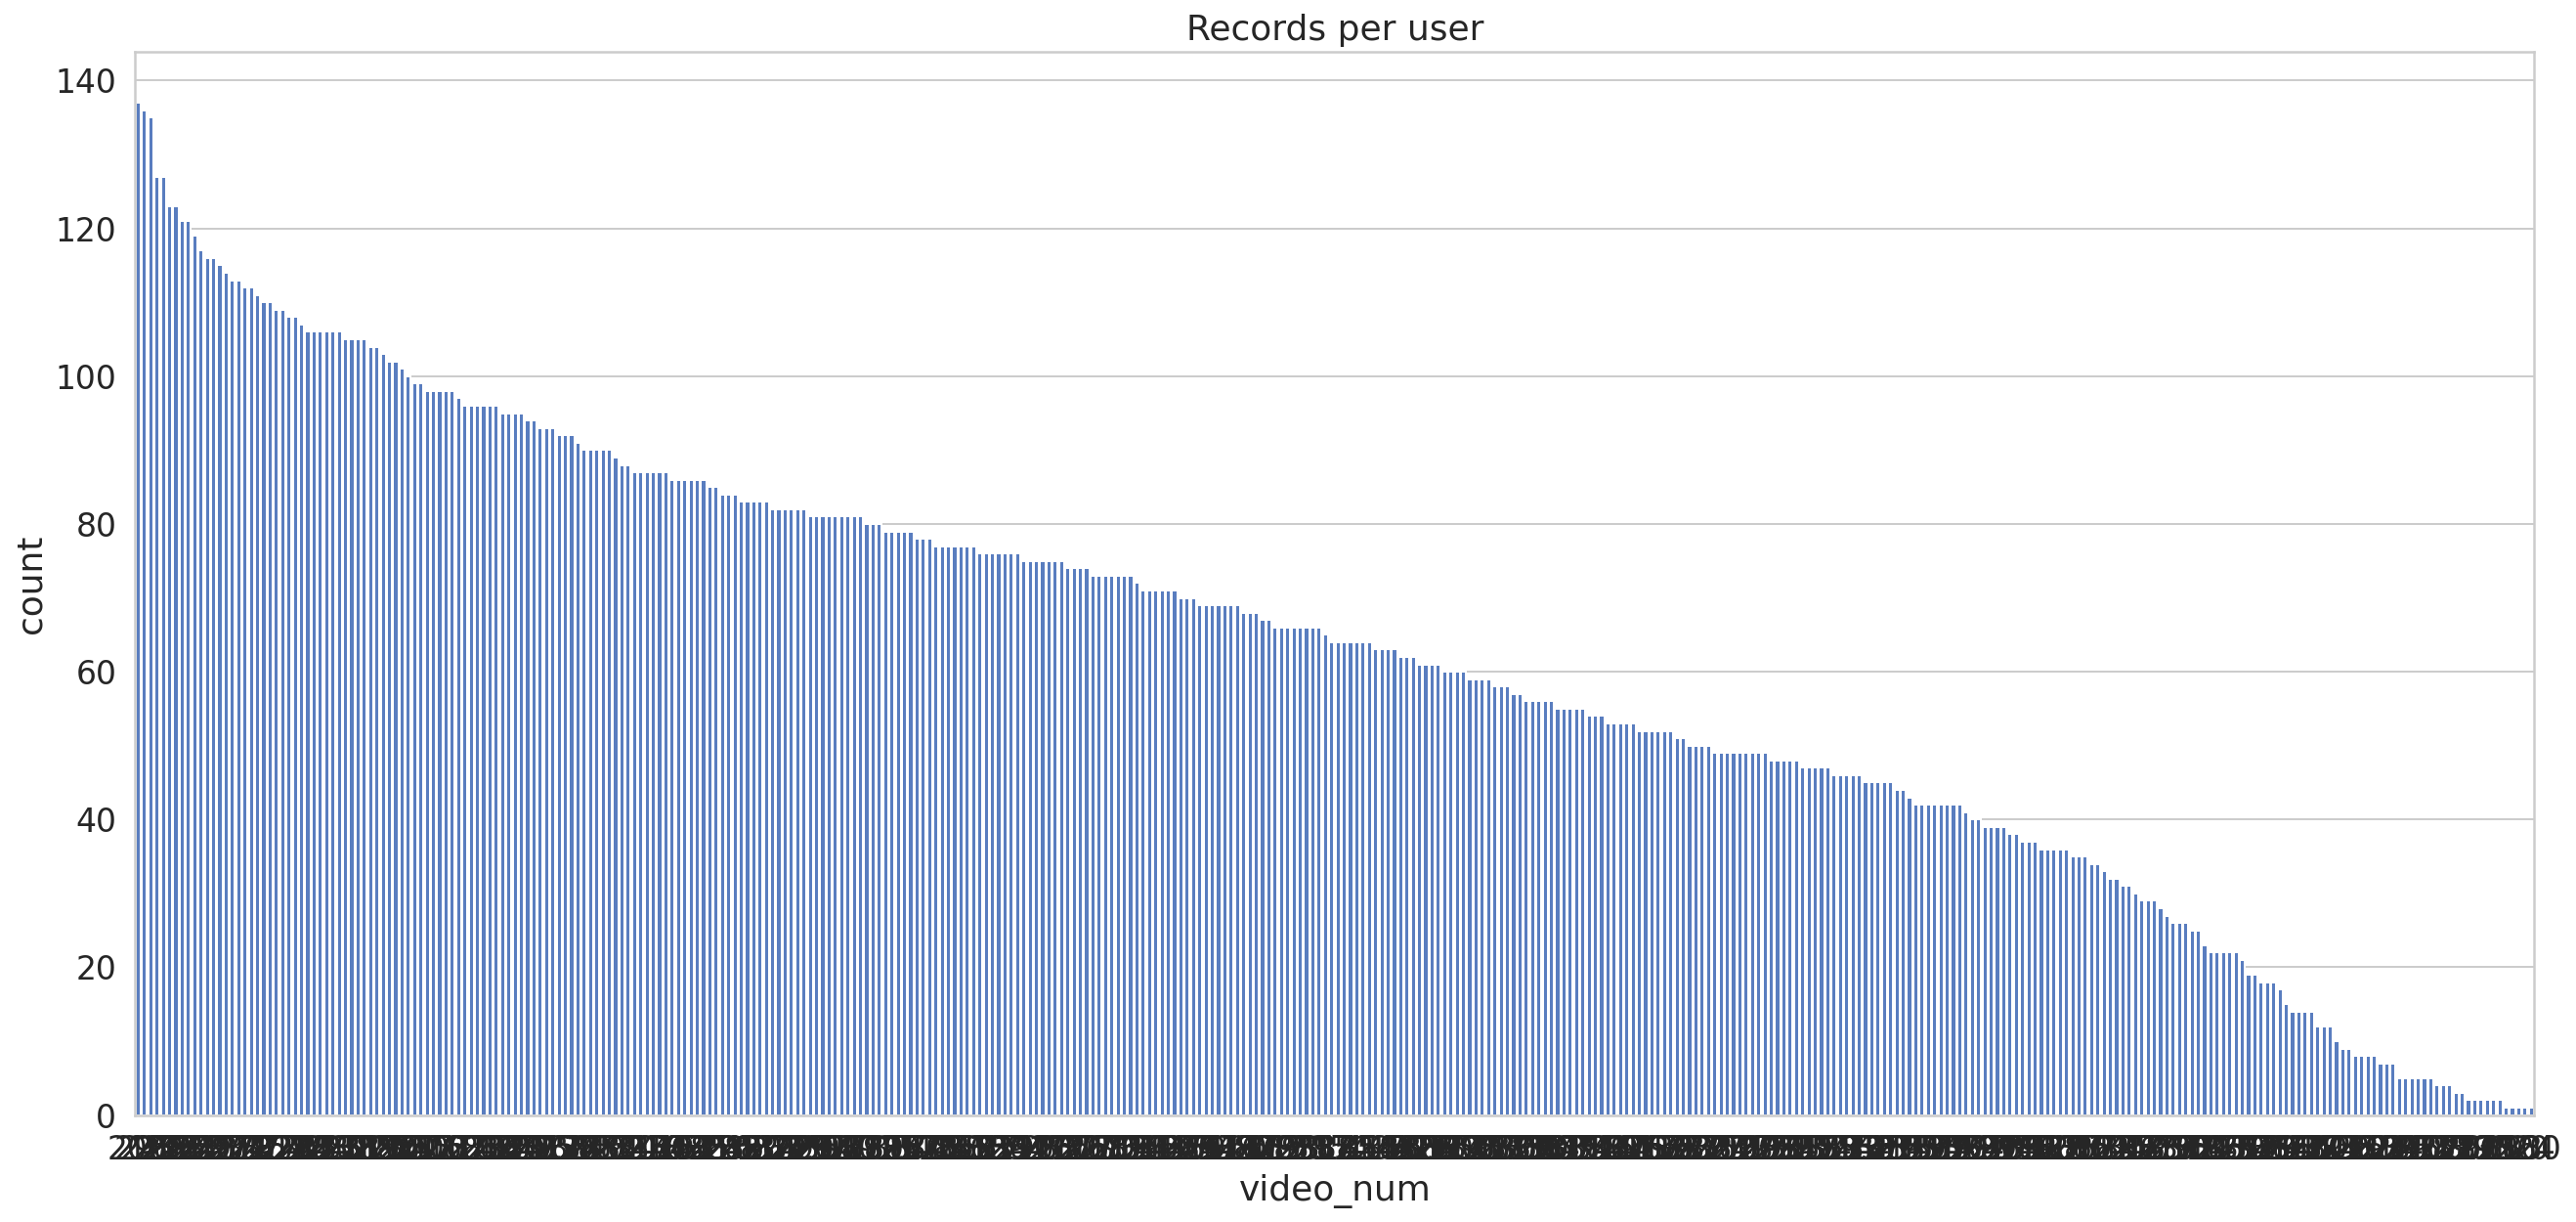

In [45]:
sns.countplot(x = 'video_num',
              data = input,
              palette=[sns.color_palette()[0]],
              order = input.video_num.value_counts().index);
plt.title("Records per user");

In [57]:
# 비디오 수 보고 다시 판단
df_train = input[input['video_num'] <= 340]
df_test = input[input['video_num'] > 340]

In [59]:
# scale_columns = [ 'd_vector_1_x', 'd_vector_1_y',
#                 'd_vector_2_x', 'd_vector_2_y',
#                 'd_vector_3_x', 'd_vector_3_y',
#                 'd_vector_4_x', 'd_vector_4_y',
#                 'd_vector_5_x', 'd_vector_5_y',
#                 'd_vector_6_x', 'd_vector_6_y',
#                 'd_vector_7_x', 'd_vector_7_y',
#                 'd_vector_8_x', 'd_vector_8_y',
#                 'd_vector_9_x', 'd_vector_9_y',
#                 'd_vector_10_x', 'd_vector_10_y',
#                 'd_vector_11_x', 'd_vector_11_y',
#                 'd_vector_12_x', 'd_vector_12_y',
#                 'd_vector_13_x', 'd_vector_13_y',
#                 'd_vector_14_x', 'd_vector_14_y',
#                 'r_vector_1_x', 'r_vector_1_y',
#                 'r_vector_2_x', 'r_vector_2_y',
#                 'r_vector_3_x', 'r_vector_3_y',
#                 'r_vector_4_x', 'r_vector_4_y',
#                 'r_vector_5_x', 'r_vector_5_y',
#                 'r_vector_6_x', 'r_vector_6_y',
#                 'r_vector_7_x', 'r_vector_7_y',
#                 'r_vector_8_x', 'r_vector_8_y',
#                 'r_vector_9_x', 'r_vector_9_y',
#                 'r_vector_10_x', 'r_vector_10_y',
#                 'r_vector_11_x', 'r_vector_11_y'
# ]
from sklearn.preprocessing import RobustScaler

scale_columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
                 26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51]

scaler = RobustScaler()

scaler = scaler.fit(df_train[scale_columns])

df_train.loc[:, scale_columns] = scaler.transform(
  df_train[scale_columns].to_numpy()
)

df_test.loc[:, scale_columns] = scaler.transform(
  df_test[scale_columns].to_numpy()
)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [60]:
def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

In [61]:
from scipy import stats
TIME_STEPS = 80
STEP = 80 #window 부분 - 파라미터 조정하면서 봐야할듯....

X_train, y_train = create_dataset(
    df_train[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
                 26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51]],
    df_train.activity,
    TIME_STEPS,
    STEP
)

X_test, y_test = create_dataset(
    df_test[[ 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
                 26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51]],
    df_test.activity,
    TIME_STEPS,
    STEP
)

In [50]:
print(X_train.shape, y_train.shape)

(250, 80, 52) (250, 1)


In [62]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

In [63]:
X_train

array([[[-0.93181818,  0.        ,  0.        , ...,  0.23189808,
         -0.52795016, -2.86237473],
        [-0.90909091,  0.        ,  0.        , ...,  0.27239085,
         -0.57336932, -3.44127171],
        [-0.88636364,  0.        ,  0.        , ...,  0.25810382,
         -0.53613853, -3.35960523],
        ...,
        [ 1.04545455,  0.        ,  0.        , ...,  0.75322374,
          0.41583568,  0.87380553],
        [ 1.06818182,  0.        ,  0.        , ...,  2.37114099,
          1.2312532 , -0.2444365 ],
        [ 1.09090909,  0.        ,  0.        , ...,  2.91564209,
          1.49695899,  3.41703242]],

       [[ 1.11363636,  0.        ,  0.        , ...,  1.00739304,
          0.53392924,  1.23669657],
        [ 1.13636364,  0.        ,  0.        , ...,  2.89514839,
          1.47449835,  3.4033624 ],
        [ 1.15909091,  0.        ,  0.        , ...,  4.2924055 ,
          2.16967735, -0.2444365 ],
        ...,
        [ 0.59090909,  0.        ,  0.        , ...,  

In [66]:
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
      keras.layers.LSTM(
          units=64,
          input_shape=[X_train.shape[1], X_train.shape[2]]
      )
    )
)
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['acc']
)

In [67]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/20
8/8 [==============================] - 3s 99ms/step - loss: 0.7930 - acc: 0.5149 - val_loss: 0.7924 - val_acc: 0.4074
Epoch 2/20
8/8 [==============================] - 0s 13ms/step - loss: 0.6665 - acc: 0.6213 - val_loss: 0.7791 - val_acc: 0.4444
Epoch 3/20
8/8 [==============================] - 0s 13ms/step - loss: 0.5865 - acc: 0.7021 - val_loss: 0.7555 - val_acc: 0.4815
Epoch 4/20
8/8 [==============================] - 0s 12ms/step - loss: 0.5609 - acc: 0.7149 - val_loss: 0.7482 - val_acc: 0.4444
Epoch 5/20
8/8 [==============================] - 0s 11ms/step - loss: 0.4852 - acc: 0.7915 - val_loss: 0.7394 - val_acc: 0.4815
Epoch 6/20
8/8 [==============================] - 0s 11ms/step - loss: 0.4724 - acc: 0.8213 - val_loss: 0.7256 - val_acc: 0.5556
Epoch 7/20
8/8 [==============================] - 0s 11ms/step - loss: 0.4303 - acc: 0.8255 - val_loss: 0.7164 - val_acc: 0.5556
Epoch 8/20
8/8 [==============================] - 0s 12ms/step - loss: 0.3731 - acc: 0.8596 - val

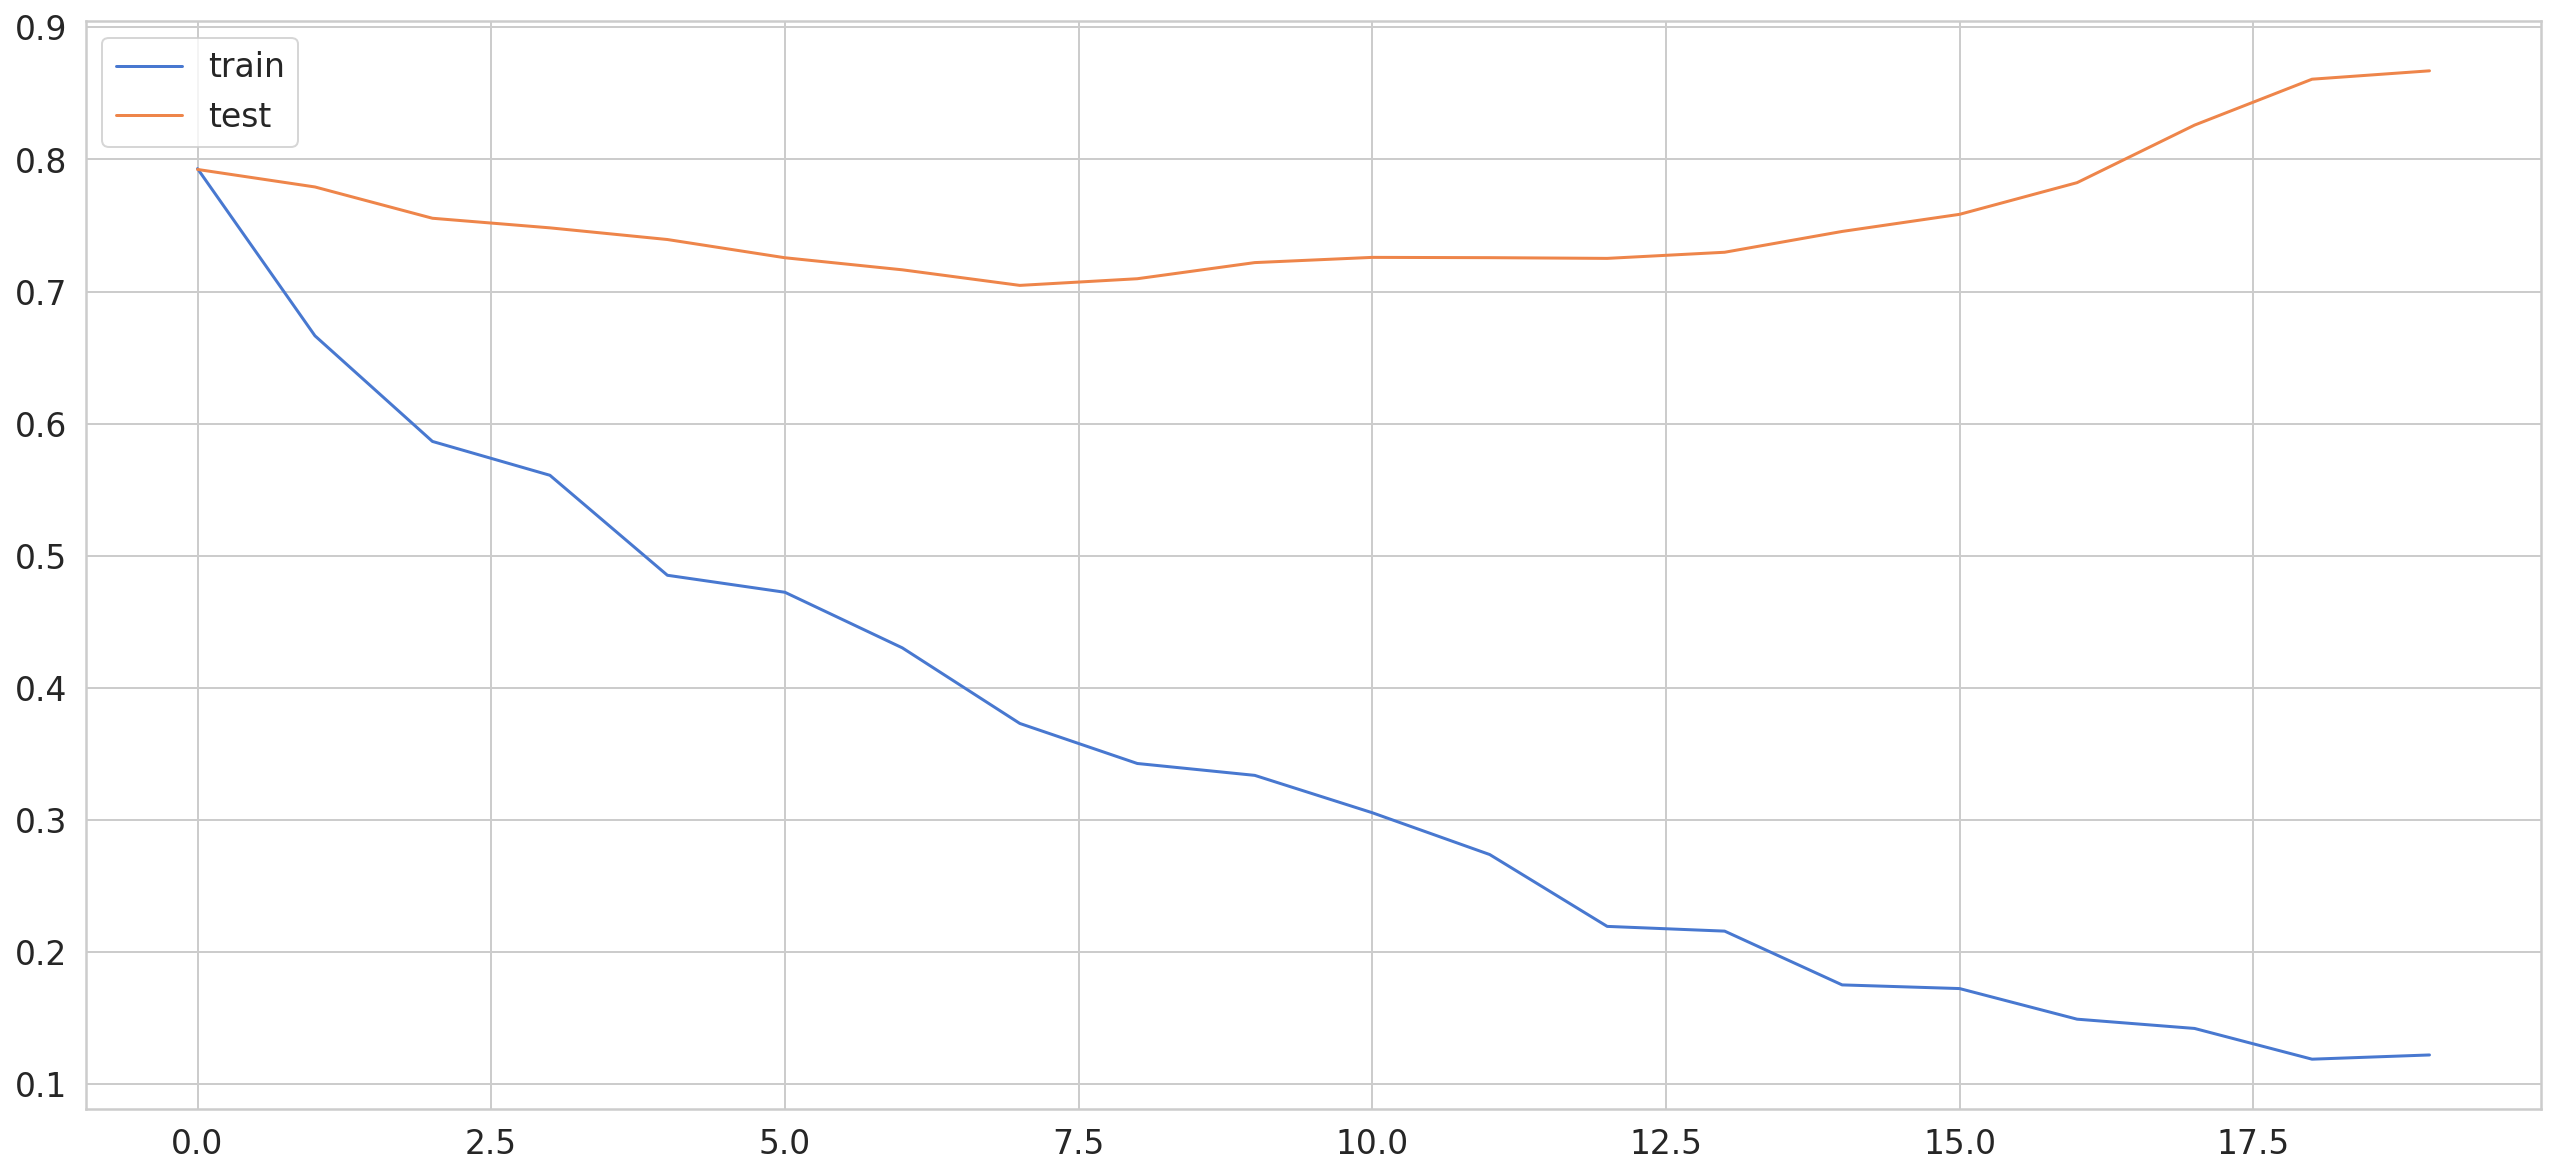

In [69]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [70]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.8652 - acc: 0.5143


[0.8652203679084778, 0.5142857432365417]

In [73]:
y_pred = model.predict(X_test)
y_pred

array([[0.12532961, 0.8746703 ],
       [0.6147072 , 0.38529283],
       [0.5496991 , 0.45030084],
       [0.92068434, 0.07931566],
       [0.59266865, 0.40733135],
       [0.36867976, 0.63132024],
       [0.15549855, 0.8445014 ],
       [0.9514487 , 0.04855135],
       [0.5915276 , 0.40847236],
       [0.5358461 , 0.4641539 ],
       [0.94281864, 0.05718136],
       [0.77428377, 0.22571622],
       [0.89250064, 0.10749935],
       [0.65386295, 0.34613708],
       [0.44300598, 0.55699396],
       [0.23094067, 0.76905936],
       [0.18552494, 0.8144751 ],
       [0.8970828 , 0.10291716],
       [0.2168533 , 0.7831467 ],
       [0.50686824, 0.49313173],
       [0.56100553, 0.43899444],
       [0.70027184, 0.29972816],
       [0.4321343 , 0.5678657 ],
       [0.1435341 , 0.8564659 ],
       [0.80285937, 0.19714062],
       [0.5959817 , 0.40401825],
       [0.91290885, 0.08709119],
       [0.32283494, 0.6771651 ],
       [0.9140568 , 0.08594324],
       [0.94953597, 0.05046409],
       [0.

heatmap 출력

In [74]:
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, class_names):
  cm = confusion_matrix(y_true, y_pred)
  fig, ax = plt.subplots(figsize=(18, 16)) 
  ax = sns.heatmap(
      cm, 
      annot=True, 
      fmt="d", 
      cmap=sns.diverging_palette(220, 20, n=7),
      ax=ax
  )

  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  ax.set_xticklabels(class_names)
  ax.set_yticklabels(class_names)
  b, t = plt.ylim() 
  b += 0.5 
  t -= 0.5 
  plt.ylim(b, t) 
  plt.show() 

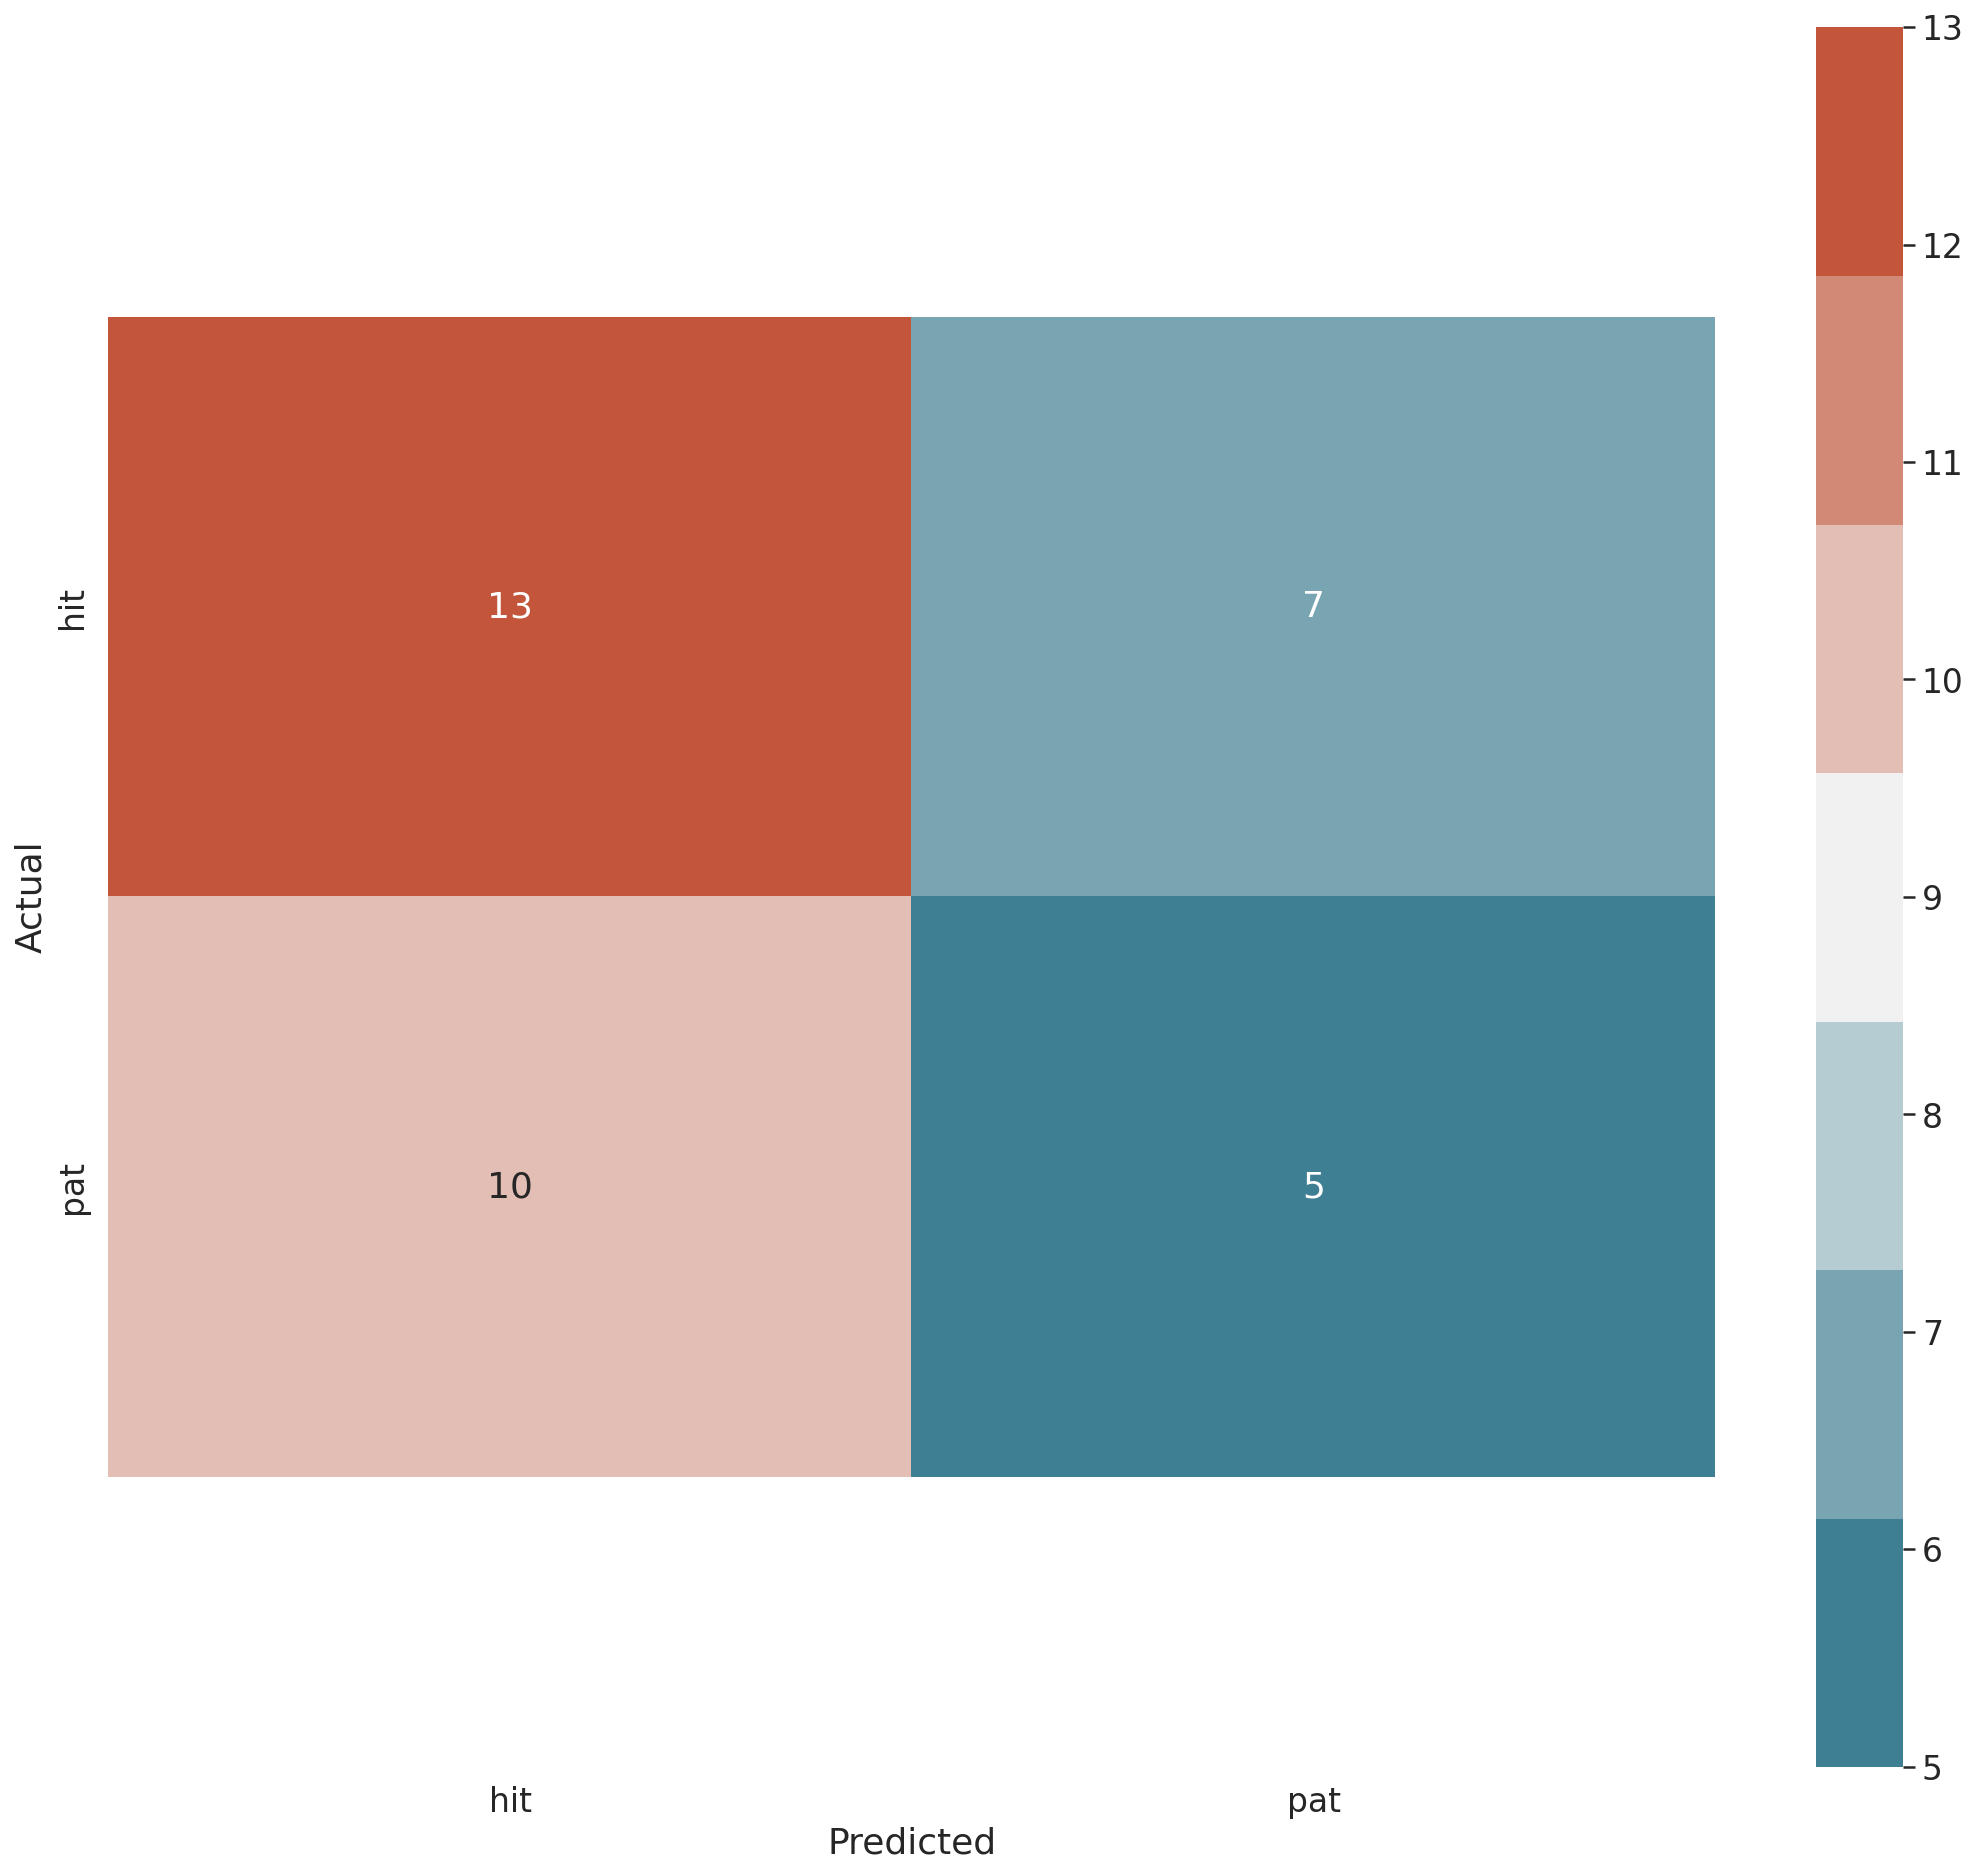

In [75]:
plot_cm(
  enc.inverse_transform(y_test),
  enc.inverse_transform(y_pred),
  enc.categories_[0]
)